# Центральная предельная теорема

## В качестве непрерывного распределения выбираем хи-квадрат распределение

In [10]:
### importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import math

In [3]:
# генерируем наше распределение
k = 5                            # k это число степеней свободы
chi_rv = sts.chi2(k)

#генерируем выборку обьема 1000 
sample = chi_rv.rvs(1000)

Text(0.5, 1.0, 'Гистограмма выборки и теоретическая плотность распределения')

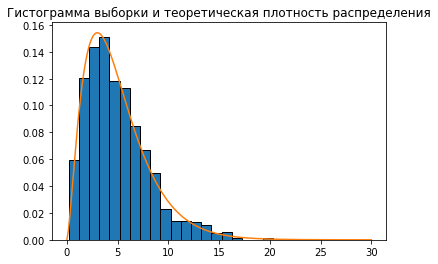

In [5]:
x = np.linspace(0, 30, 200)
plt.hist(sample, bins=20, density=True, label='Xi-distribution', ec='black')

### chi_rv.cdf(x) --> возвращает значение функций хи-распределения, 
### chi_rv.pdf(x) --> возвращает значение функции плотности вероятности хи-распределения
plt.plot(x, chi_rv.pdf(x))
plt.title('Гистограмма выборки и теоретическая плотность распределения')

## Распределение выборочного среднего

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

**Для n = 5:**

In [16]:
### создадим общее хи-распределение для наших n = 5, 10, 50:
chi = sts.chi2(5)

In [22]:
### при каждый итерации будем добавлять выборочное среднее в этот лист:
sample_means_5 = []

for i in range(1000):
    samples = chi.rvs(5)
    sample_means_5.append(samples.mean())

sample_means_5 = np.array(sample_means_5)

Строим гистограмму и плотность нормального распределения. Параметры нормального распределения: $\mu = \mathbf{E}X = k, \sigma = \sqrt{\dfrac{\mathbf{D}X}{n}} = \sqrt{\frac{2k}{n}}$

In [11]:
mu = 5
sigma = math.sqrt(2*5/5)

norm_rv_5 = sts.norm(loc=mu, scale=sigma)

Text(0.5, 1.0, 'Гистограмма выборки и теоретическая плотность распределения')

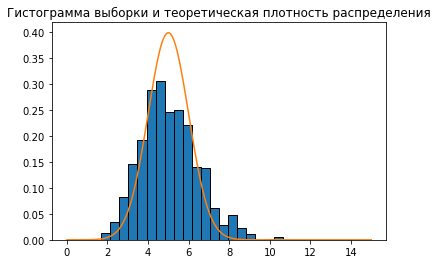

In [31]:
### Строим гистограмму и плотность нормального распределения:

plt.hist(sample_means_5, bins=20, density=True, ec='black')

x=np.linspace(0, 15, 200)
plt.plot(x, norm_rv_5.pdf(x))
plt.title('Гистограмма выборки и теоретическая плотность распределения')

**Для n = 10:**

In [26]:
### при каждый итерации будем добавлять выборочное среднее в этот лист:
sample_means_10 = []

for i in range(1000):
    samples = chi.rvs(10)
    sample_means_10.append(samples.mean())

sample_means_10 = np.array(sample_means_10)

### создаем приближенное нормальное распределение:
mu = 5
sigma = math.sqrt(2*5/10)
norm_rv_10 = sts.norm(loc=mu, scale=sigma)

Text(0.5, 1.0, 'Гистограмма выборки и теоретическая плотность распределения для n=10')

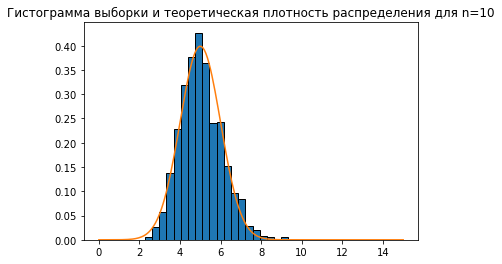

In [32]:
### Строим гистограмму и плотность нормального распределения:

plt.hist(sample_means_10, bins=20, density=True, ec='black')

x=np.linspace(0, 15, 200)
plt.plot(x, norm_rv_10.pdf(x))
plt.title("Гистограмма выборки и теоретическая плотность распределения для n=10")

## Для n = 50:

In [28]:
### при каждый итерации будем добавлять выборочное среднее в этот лист:
sample_means_50 = []

for i in range(1000):
    samples = chi.rvs(50)
    sample_means_50.append(samples.mean())

### создаем приближенное нормальное распределение:
mu = 5
sigma = math.sqrt(2*5/50)
norm_rv_50 = sts.norm(loc=mu, scale=sigma)

Text(0.5, 1.0, 'Гистограмма выборки и теоретическая плотность распределения для n=50')

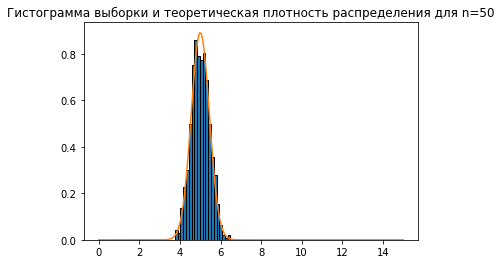

In [33]:
### Строим гистограмму и плотность нормального распределения:

plt.hist(sample_means_50, bins=20, density=True, ec='black')

x=np.linspace(0, 15, 200)
plt.plot(x, norm_rv_50.pdf(x))
plt.title("Гистограмма выборки и теоретическая плотность распределения для n=50")

### Bыводы по результатам выполнения задания:

При увеличении размера выборки $n$ гистограмма выборочных средних все больше приближается к плотности нормального распределения. Также видно, что при увеличении размера выборки $n$ пик становится все выше (дисперсия обратно пропорциональна $n$). В целом наблюдается отличное соответствие полученных результатов центральной предельной теореме.